In [4]:
#Q1)
import numpy as np
import pandas as pd

try:
    data = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', compression='zip')
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: 'Revenue' column not found. Please check the target column name.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

class_1 = X[y == False].select_dtypes(include=np.number)
class_2 = X[y == True].select_dtypes(include=np.number)

centroid_1 = np.mean(class_1, axis=0)
centroid_2 = np.mean(class_2, axis=0)

spread_1 = np.std(class_1, axis=0)
spread_2 = np.std(class_2, axis=0)

interclass_distance = np.linalg.norm(centroid_1 - centroid_2)

print("Class 1 (Non-purchasers) Centroid:", centroid_1)
print("Class 2 (Purchasers) Centroid:", centroid_2)
print("Class 1 (Non-purchasers) Spread (Std Dev):", spread_1)
print("Class 2 (Purchasers) Spread (Std Dev):", spread_2)
print("Interclass Distance:", interclass_distance)

Class 1 (Non-purchasers) Centroid: Administrative                2.117732
Administrative_Duration      73.740111
Informational                 0.451833
Informational_Duration       30.236237
ProductRelated               28.714642
ProductRelated_Duration    1069.987809
BounceRates                   0.025317
ExitRates                     0.047378
PageValues                    1.975998
SpecialDay                    0.068432
OperatingSystems              2.129726
Browser                       2.339474
Region                        3.159278
TrafficType                   4.078392
dtype: float64
Class 2 (Purchasers) Centroid: Administrative                3.393606
Administrative_Duration     119.483244
Informational                 0.786164
Informational_Duration       57.611427
ProductRelated               48.210168
ProductRelated_Duration    1876.209615
BounceRates                   0.005117
ExitRates                     0.019555
PageValues                   27.264518
SpecialDay            

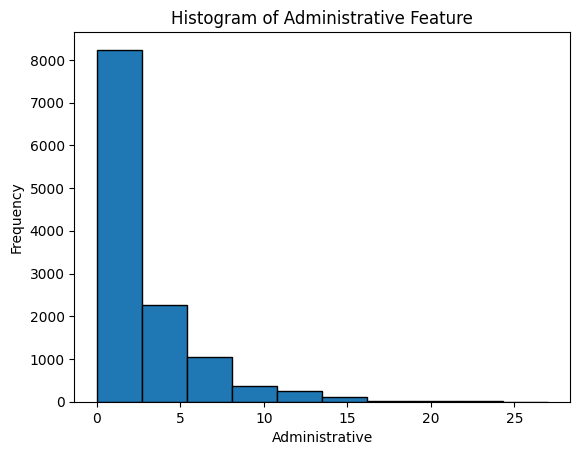

Mean of Administrative feature: 2.3151662611516626
Variance of Administrative feature: 11.033354737157387


In [5]:
#Q2)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', compression='zip')
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: 'Revenue' column not found. Please check the target column name.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()


feature_data = X['Administrative']

hist, bins = np.histogram(feature_data, bins=10)  # 10 buckets


plt.hist(feature_data, bins=bins, edgecolor='black')
plt.title('Histogram of Administrative Feature')
plt.xlabel('Administrative')
plt.ylabel('Frequency')
plt.show()

mean = np.mean(feature_data)
variance = np.var(feature_data)

print(f"Mean of Administrative feature: {mean}")
print(f"Variance of Administrative feature: {variance}")

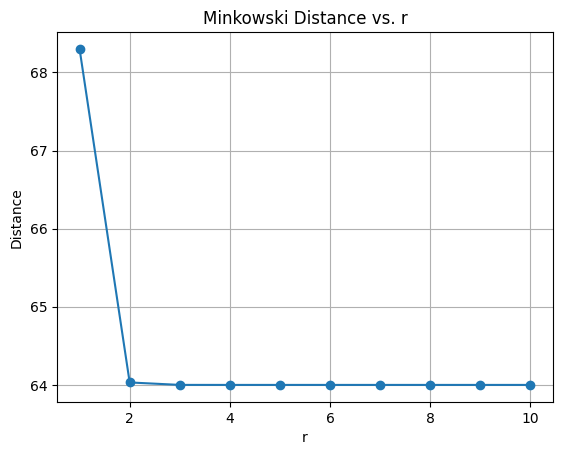

In [7]:
#Q3)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


try:
    data = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', compression='zip')
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: 'Revenue' column not found. Please check the target column name.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

X = X.select_dtypes(include=np.number)

vector1 = X.iloc[0].values
vector2 = X.iloc[1].values

distances = []
r_values = range(1, 11)
for r in r_values:
    distance = np.sum(np.abs(vector1 - vector2)**r)**(1/r)
    distances.append(distance)

plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [8]:
#Q4)
import pandas as pd
from sklearn.model_selection import train_test_split

try:
    data = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', compression='zip')
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: 'Revenue' column not found. Please check the target column name.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

X_two_classes = X[y.isin([True, False])]
y_two_classes = y[y.isin([True, False])]

X_train, X_test, y_train, y_test = train_test_split(
    X_two_classes, y_two_classes, test_size=0.3, random_state=42  # 30% for testing
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (8631, 17)
Test set shape: (3699, 17)


In [9]:
#Q5)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

try:
    data = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', compression='zip')
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: 'Revenue' column not found. Please check the target column name.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

X_two_classes = X[y.isin([True, False])]
y_two_classes = y[y.isin([True, False])]

X_train, X_test, y_train, y_test = train_test_split(
    X_two_classes, y_two_classes, test_size=0.3, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test = scaler.transform(X_test.select_dtypes(include=np.number))

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

print("kNN classifier with k=3 successfully trained on the training set.")

kNN classifier with k=3 successfully trained on the training set.


In [10]:
#Q6)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

try:
    data = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', compression='zip')
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: 'Revenue' column not found. Please check the target column name.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

X_two_classes = X[y.isin([True, False])]
y_two_classes = y[y.isin([True, False])]

X_train, X_test, y_train, y_test = train_test_split(
    X_two_classes, y_two_classes, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test = scaler.transform(X_test.select_dtypes(include=np.number))

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the kNN classifier (k=3): {accuracy}")

Accuracy of the kNN classifier (k=3): 0.8759124087591241


In [11]:
#Q7)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

try:
    data = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', compression='zip')
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: 'Revenue' column not found. Please check the target column name.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

X_two_classes = X[y.isin([True, False])]
y_two_classes = y[y.isin([True, False])]

X_train, X_test, y_train, y_test = train_test_split(
    X_two_classes, y_two_classes, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test = scaler.transform(X_test.select_dtypes(include=np.number))

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred_test = knn_classifier.predict(X_test)
print("Predictions for the test set:\n", y_pred_test)

test_vector_index = 0
test_vector = X_test[test_vector_index]
predicted_class = knn_classifier.predict([test_vector])

print(f"\nPredicted class for the test vector at index {test_vector_index}: {predicted_class[0]}")

Predictions for the test set:
 [False  True False ... False  True False]

Predicted class for the test vector at index 0: False


Accuracy of NN classifier (k=1): 0.8453636117869695
Accuracy of kNN classifier (k=3): 0.8759124087591241


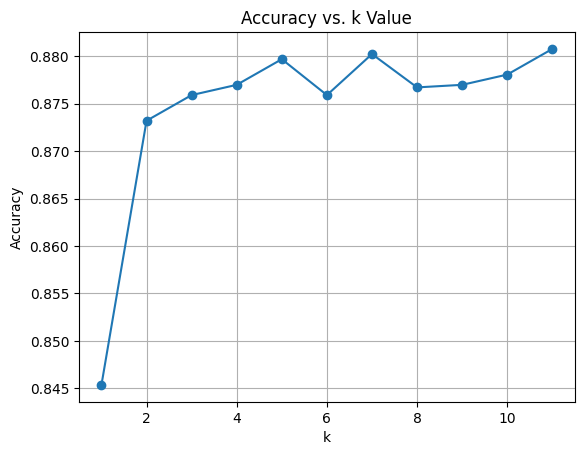

In [12]:
#Q8)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', compression='zip')
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: 'Revenue' column not found. Please check the target column name.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

X_two_classes = X[y.isin([True, False])]
y_two_classes = y[y.isin([True, False])]

X_train, X_test, y_train, y_test = train_test_split(
    X_two_classes, y_two_classes, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=np.number))

nn_classifier = KNeighborsClassifier(n_neighbors=1)
nn_classifier.fit(X_train_scaled, y_train)
y_pred_nn = nn_classifier.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy of NN classifier (k=1): {accuracy_nn}")

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of kNN classifier (k=3): {accuracy_knn}")

k_values = range(1, 12)
accuracies = []
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [13]:
#Q9)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

try:
    data = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', compression='zip')
    X = data.drop('Revenue', axis=1)
    y = data['Revenue']
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: 'Revenue' column not found. Please check the target column name.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

X_two_classes = X[y.isin([True, False])]
y_two_classes = y[y.isin([True, False])]


X_train, X_test, y_train, y_test = train_test_split(X_two_classes, y_two_classes, test_size=0.3, random_state=42)

numerical_features = X_train.select_dtypes(include=np.number).columns
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)


knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

y_pred_train = knn_classifier.predict(X_train_scaled)
y_pred_test = knn_classifier.predict(X_test_scaled)

print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

print("\nClassification Report (Training Data):\n", classification_report(y_train, y_pred_train))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred_test))



Confusion Matrix (Test Data):
 [[2985  139]
 [ 320  255]]

Classification Report (Training Data):
               precision    recall  f1-score   support

       False       0.93      0.98      0.95      7298
        True       0.83      0.59      0.69      1333

    accuracy                           0.92      8631
   macro avg       0.88      0.79      0.82      8631
weighted avg       0.91      0.92      0.91      8631


Classification Report (Test Data):
               precision    recall  f1-score   support

       False       0.90      0.96      0.93      3124
        True       0.65      0.44      0.53       575

    accuracy                           0.88      3699
   macro avg       0.78      0.70      0.73      3699
weighted avg       0.86      0.88      0.87      3699

